In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Replace 'path/to/your/file.csv' with the actual path to your file in Google Drive
file_path = '/content/drive/MyDrive/Dev_data_to_be_shared.csv'
df = pd.read_csv(file_path)

In [ ]:
df.isna().sum()

,0
account_number,0
bad_flag,0
onus_attribute_1,25231
transaction_attribute_1,25231
transaction_attribute_2,25231
...,...
onus_attribute_44,85196
onus_attribute_45,85196
onus_attribute_46,85196
onus_attribute_47,85196


In [ ]:
df_0 = df[df['bad_flag']==0]
df_1 = df[df['bad_flag']==1]

In [ ]:
nan_counts = df_0.isna().sum()
nan_counts_equal = nan_counts == len(df_0.columns)
for nan_counts_equal in nan_counts:
    if nan_counts_equal == True:
        print('All columns have missing values in the good data')

In [ ]:
nan_counts = df_1.isna().sum()
nan_counts_equal = nan_counts == len(df_1.columns)
for nan_counts_equal in nan_counts:
    if nan_counts_equal == True:
        print('All columns have missing values in the good data')

In [ ]:
df = df.drop(columns='account_number')

In [ ]:
df['sum_column'] = df.iloc[:, 2:666].sum(axis=1) # Example: adding columns from index 10 to 609

In [ ]:
df

bad_flag  onus_attribute_1  transaction_attribute_1  \
0             0               NaN                      NaN   
1             0        221000.000                    0.000   
2             0         25000.000                    0.000   
3             0         86000.000                    0.000   
4             0        215000.000                    0.000   
...         ...               ...                      ...   
96801         0        156000.000                    0.000   
96802         0         46000.000                    0.000   
96803         0         95000.000                    0.000   
96804         0         88000.000                    0.000   
96805         0         94000.000                    0.000   

       transaction_attribute_2  transaction_attribute_3  \
0                          NaN                      NaN   
1                        0.000                    0.000   
2                        0.000                    0.000   
3                        0.000                    0.000   
4                        0.000                    0.000   
...                        ...                      ...   
96801                    0.000                    0.000   
96802                    0.000                    0.000   
96803                    0.000                    0.000   
96804                    0.000                    0.000   
96805                    0.000                    0.000   

       transaction_attribute_4  transaction_attribute_5  \
0                          NaN                      NaN   
1                        0.000                    0.000   
2                        0.000                    0.000   
3                        0.000                    0.000   
4                        0.000                    0.000   
...                        ...                      ...   
96801                    0.000                    0.000   
96802                    0.000                    0.000   
96803                    0.000                    0.000   
96804                    0.000                    0.000   
96805                    0.000                    0.000   

       transaction_attribute_6  transaction_attribute_7  \
0                          NaN                      NaN   
1                        0.000                    0.000   
2                        0.000                    0.000   
3                        0.000                    0.000   
4                        0.000                    0.000   
...                        ...                      ...   
96801                    0.000                    0.000   
96802                    0.000                    0.000   
96803                    0.000                    0.000   
96804                    0.000                    0.000   
96805                    0.000                    0.000   

       transaction_attribute_8  transaction_attribute_9  \
0                          NaN                      NaN   
1                        0.000                    0.000   
2                        0.000                    0.000   
3                        0.000                    0.000   
4                        0.000                    0.000   
...                        ...                      ...   
96801                    0.000                    0.000   
96802                    0.000                    0.000   
96803                    0.000                    0.000   
96804                    0.000                    0.000   
96805                    0.000                    0.000   

       transaction_attribute_10  transaction_attribute_11  \
0                           NaN                       NaN   
1                         0.000                     0.000   
2                         0.000                     0.000   
3                         0.000                     0.000   
4                         0.000                     0.000   
...                         ...                       ...   

In [ ]:
all_nan_cols = df.columns[df.isna().all()]

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [ ]:
df_dropped = df.drop(columns= ['bureau_436','bureau_447'])

In [ ]:
df_dropped.drop(columns=df.columns[2:666],inplace=True)

KeyError: "['transaction_attribute_1', 'transaction_attribute_2', 'transaction_attribute_3', 'transaction_attribute_4', 'transaction_attribute_5', 'transaction_attribute_6', 'transaction_attribute_7', 'transaction_attribute_8', 'transaction_attribute_9', 'transaction_attribute_10', 'transaction_attribute_11', 'transaction_attribute_12', 'transaction_attribute_13', 'transaction_attribute_14', 'transaction_attribute_15', 'transaction_attribute_16', 'transaction_attribute_17', 'transaction_attribute_18', 'transaction_attribute_19', 'transaction_attribute_20', 'transaction_attribute_21', 'transaction_attribute_22', 'transaction_attribute_23', 'transaction_attribute_24', 'transaction_attribute_25', 'transaction_attribute_26', 'transaction_attribute_27', 'transaction_attribute_28', 'transaction_attribute_29', 'transaction_attribute_30', 'transaction_attribute_31', 'transaction_attribute_32', 'transaction_attribute_33', 'transaction_attribute_34', 'transaction_attribute_35', 'transaction_attribute_36', 'transaction_attribute_37', 'transaction_attribute_38', 'transaction_attribute_39', 'transaction_attribute_40', 'transaction_attribute_41', 'transaction_attribute_42', 'transaction_attribute_43', 'transaction_attribute_44', 'transaction_attribute_45', 'transaction_attribute_46', 'transaction_attribute_47', 'transaction_attribute_48', 'transaction_attribute_49', 'transaction_attribute_50', 'transaction_attribute_51', 'transaction_attribute_52', 'transaction_attribute_53', 'transaction_attribute_54', 'transaction_attribute_55', 'transaction_attribute_56', 'transaction_attribute_57', 'transaction_attribute_58', 'transaction_attribute_59', 'transaction_attribute_60', 'transaction_attribute_61', 'transaction_attribute_62', 'transaction_attribute_63', 'transaction_attribute_64', 'transaction_attribute_65', 'transaction_attribute_66', 'transaction_attribute_67', 'transaction_attribute_68', 'transaction_attribute_69', 'transaction_attribute_70', 'transaction_attribute_71', 'transaction_attribute_72', 'transaction_attribute_73', 'transaction_attribute_74', 'transaction_attribute_75', 'transaction_attribute_76', 'transaction_attribute_77', 'transaction_attribute_78', 'transaction_attribute_79', 'transaction_attribute_80', 'transaction_attribute_81', 'transaction_attribute_82', 'transaction_attribute_83', 'transaction_attribute_84', 'transaction_attribute_85', 'transaction_attribute_86', 'transaction_attribute_87', 'transaction_attribute_88', 'transaction_attribute_89', 'transaction_attribute_90', 'transaction_attribute_91', 'transaction_attribute_92', 'transaction_attribute_93', 'transaction_attribute_94', 'transaction_attribute_95', 'transaction_attribute_96', 'transaction_attribute_97', 'transaction_attribute_98', 'transaction_attribute_99', 'transaction_attribute_100', 'transaction_attribute_101', 'transaction_attribute_102', 'transaction_attribute_103', 'transaction_attribute_104', 'transaction_attribute_105', 'transaction_attribute_106', 'transaction_attribute_107', 'transaction_attribute_108', 'transaction_attribute_109', 'transaction_attribute_110', 'transaction_attribute_111', 'transaction_attribute_112', 'transaction_attribute_113', 'transaction_attribute_114', 'transaction_attribute_115', 'transaction_attribute_116', 'transaction_attribute_117', 'transaction_attribute_118', 'transaction_attribute_119', 'transaction_attribute_120', 'transaction_attribute_121', 'transaction_attribute_122', 'transaction_attribute_123', 'transaction_attribute_124', 'transaction_attribute_125', 'transaction_attribute_126', 'transaction_attribute_127', 'transaction_attribute_128', 'transaction_attribute_129', 'transaction_attribute_130', 'transaction_attribute_131', 'transaction_attribute_132', 'transaction_attribute_133', 'transaction_attribute_134', 'transaction_attribute_135', 'transaction_attribute_136', 'transaction_attribute_137', 'transaction_attribute_138', 'transaction_attribute_139', 'transaction_attribute_140', 'transaction_attribute_141', 'transaction_attribute_142', 'transaction_attribute_143', 'transaction_attribute_144', 'transaction_attribute_145', 'transaction_attribute_146', 'transaction_attribute_147', 'transaction_attribute_148', 'transaction_attribute_149', 'transaction_attribute_150', 'transaction_attribute_151', 'transaction_attribute_152', 'transaction_attribute_153', 'transaction_attribute_154', 'transaction_attribute_155', 'transaction_attribute_156', 'transaction_attribute_157', 'transaction_attribute_158', 'transaction_attribute_159', 'transaction_attribute_160', 'transaction_attribute_161', 'transaction_attribute_162', 'transaction_attribute_163', 'transaction_attribute_164', 'transaction_attribute_165', 'transaction_attribute_166', 'transaction_attribute_167', 'transaction_attribute_168', 'transaction_attribute_169', 'transaction_attribute_170', 'transaction_attribute_171', 'transaction_attribute_172', 'transaction_attribute_173', 'transaction_attribute_174', 'transaction_attribute_175', 'transaction_attribute_176', 'transaction_attribute_177', 'transaction_attribute_178', 'transaction_attribute_179', 'transaction_attribute_180', 'transaction_attribute_181', 'transaction_attribute_182', 'transaction_attribute_183', 'transaction_attribute_184', 'transaction_attribute_185', 'transaction_attribute_186', 'transaction_attribute_187', 'transaction_attribute_188', 'transaction_attribute_189', 'transaction_attribute_190', 'transaction_attribute_191', 'transaction_attribute_192', 'transaction_attribute_193', 'transaction_attribute_194', 'transaction_attribute_195', 'transaction_attribute_196', 'transaction_attribute_197', 'transaction_attribute_198', 'transaction_attribute_199', 'transaction_attribute_200', 'transaction_attribute_201', 'transaction_attribute_202', 'transaction_attribute_203', 'transaction_attribute_204', 'transaction_attribute_205', 'transaction_attribute_206', 'transaction_attribute_207', 'transaction_attribute_208', 'transaction_attribute_209', 'transaction_attribute_210', 'transaction_attribute_211', 'transaction_attribute_212', 'transaction_attribute_213', 'transaction_attribute_214', 'transaction_attribute_215', 'transaction_attribute_216', 'transaction_attribute_217', 'transaction_attribute_218', 'transaction_attribute_219', 'transaction_attribute_220', 'transaction_attribute_221', 'transaction_attribute_222', 'transaction_attribute_223', 'transaction_attribute_224', 'transaction_attribute_225', 'transaction_attribute_226', 'transaction_attribute_227', 'transaction_attribute_228', 'transaction_attribute_229', 'transaction_attribute_230', 'transaction_attribute_231', 'transaction_attribute_232', 'transaction_attribute_233', 'transaction_attribute_234', 'transaction_attribute_235', 'transaction_attribute_236', 'transaction_attribute_237', 'transaction_attribute_238', 'transaction_attribute_239', 'transaction_attribute_240', 'transaction_attribute_241', 'transaction_attribute_242', 'transaction_attribute_243', 'transaction_attribute_244', 'transaction_attribute_245', 'transaction_attribute_246', 'transaction_attribute_247', 'transaction_attribute_248', 'transaction_attribute_249', 'transaction_attribute_250', 'transaction_attribute_251', 'transaction_attribute_252', 'transaction_attribute_253', 'transaction_attribute_254', 'transaction_attribute_255', 'transaction_attribute_256', 'transaction_attribute_257', 'transaction_attribute_258', 'transaction_attribute_259', 'transaction_attribute_260', 'transaction_attribute_261', 'transaction_attribute_262', 'transaction_attribute_263', 'transaction_attribute_264', 'transaction_attribute_265', 'transaction_attribute_266', 'transaction_attribute_267', 'transaction_attribute_268', 'transaction_attribute_269', 'transaction_attribute_270', 'transaction_attribute_271', 'transaction_attribute_272', 'transaction_attribute_273', 'transaction_attribute_274', 'transaction_attribute_275', 'transaction_attribute_276', 'transaction_attribute_277', 'transaction_attribute_278', 'transaction_attribute_279', 'transaction_attribute_280', 'transaction_attribute_281', 'transaction_attribute_282', 'transaction_attribute_283', 'transaction_attribute_284', 'transaction_attribute_285', 'transaction_attribute_286', 'transaction_attribute_287', 'transaction_attribute_288', 'transaction_attribute_289', 'transaction_attribute_290', 'transaction_attribute_291', 'transaction_attribute_292', 'transaction_attribute_293', 'transaction_attribute_294', 'transaction_attribute_295', 'transaction_attribute_296', 'transaction_attribute_297', 'transaction_attribute_298', 'transaction_attribute_299', 'transaction_attribute_300', 'transaction_attribute_301', 'transaction_attribute_302', 'transaction_attribute_303', 'transaction_attribute_304', 'transaction_attribute_305', 'transaction_attribute_306', 'transaction_attribute_307', 'transaction_attribute_308', 'transaction_attribute_309', 'transaction_attribute_310', 'transaction_attribute_311', 'transaction_attribute_312', 'transaction_attribute_313', 'transaction_attribute_314', 'transaction_attribute_315', 'transaction_attribute_316', 'transaction_attribute_317', 'transaction_attribute_318', 'transaction_attribute_319', 'transaction_attribute_320', 'transaction_attribute_321', 'transaction_attribute_322', 'transaction_attribute_323', 'transaction_attribute_324', 'transaction_attribute_325', 'transaction_attribute_326', 'transaction_attribute_327', 'transaction_attribute_328', 'transaction_attribute_329', 'transaction_attribute_330', 'transaction_attribute_331', 'transaction_attribute_332', 'transaction_attribute_333', 'transaction_attribute_334', 'transaction_attribute_335', 'transaction_attribute_336', 'transaction_attribute_337', 'transaction_attribute_338', 'transaction_attribute_339', 'transaction_attribute_340', 'transaction_attribute_341', 'transaction_attribute_342', 'transaction_attribute_343', 'transaction_attribute_344', 'transaction_attribute_345', 'transaction_attribute_346', 'transaction_attribute_347', 'transaction_attribute_348', 'transaction_attribute_349', 'transaction_attribute_350', 'transaction_attribute_351', 'transaction_attribute_352', 'transaction_attribute_353', 'transaction_attribute_354', 'transaction_attribute_355', 'transaction_attribute_356', 'transaction_attribute_357', 'transaction_attribute_358', 'transaction_attribute_359', 'transaction_attribute_360', 'transaction_attribute_361', 'transaction_attribute_362', 'transaction_attribute_363', 'transaction_attribute_364', 'transaction_attribute_365', 'transaction_attribute_366', 'transaction_attribute_367', 'transaction_attribute_368', 'transaction_attribute_369', 'transaction_attribute_370', 'transaction_attribute_371', 'transaction_attribute_372', 'transaction_attribute_373', 'transaction_attribute_374', 'transaction_attribute_375', 'transaction_attribute_376', 'transaction_attribute_377', 'transaction_attribute_378', 'transaction_attribute_379', 'transaction_attribute_380', 'transaction_attribute_381', 'transaction_attribute_382', 'transaction_attribute_383', 'transaction_attribute_384', 'transaction_attribute_385', 'transaction_attribute_386', 'transaction_attribute_387', 'transaction_attribute_388', 'transaction_attribute_389', 'transaction_attribute_390', 'transaction_attribute_391', 'transaction_attribute_392', 'transaction_attribute_393', 'transaction_attribute_394', 'transaction_attribute_395', 'transaction_attribute_396', 'transaction_attribute_397', 'transaction_attribute_398', 'transaction_attribute_399', 'transaction_attribute_400', 'transaction_attribute_401', 'transaction_attribute_402', 'transaction_attribute_403', 'transaction_attribute_404', 'transaction_attribute_405', 'transaction_attribute_406', 'transaction_attribute_407', 'transaction_attribute_408', 'transaction_attribute_409', 'transaction_attribute_410', 'transaction_attribute_411', 'transaction_attribute_412', 'transaction_attribute_413', 'transaction_attribute_414', 'transaction_attribute_415', 'transaction_attribute_416', 'transaction_attribute_417', 'transaction_attribute_418', 'transaction_attribute_419', 'transaction_attribute_420', 'transaction_attribute_421', 'transaction_attribute_422', 'transaction_attribute_423', 'transaction_attribute_424', 'transaction_attribute_425', 'transaction_attribute_426', 'transaction_attribute_427', 'transaction_attribute_428', 'transaction_attribute_429', 'transaction_attribute_430', 'transaction_attribute_431', 'transaction_attribute_432', 'transaction_attribute_433', 'transaction_attribute_434', 'transaction_attribute_435', 'transaction_attribute_436', 'transaction_attribute_437', 'transaction_attribute_438', 'transaction_attribute_439', 'transaction_attribute_440', 'transaction_attribute_441', 'transaction_attribute_442', 'transaction_attribute_443', 'transaction_attribute_444', 'transaction_attribute_445', 'transaction_attribute_446', 'transaction_attribute_447', 'transaction_attribute_448', 'transaction_attribute_449', 'transaction_attribute_450', 'transaction_attribute_451', 'transaction_attribute_452', 'transaction_attribute_453', 'transaction_attribute_454', 'transaction_attribute_455', 'transaction_attribute_456', 'transaction_attribute_457', 'transaction_attribute_458', 'transaction_attribute_459', 'transaction_attribute_460', 'transaction_attribute_461', 'transaction_attribute_462', 'transaction_attribute_463', 'transaction_attribute_464', 'transaction_attribute_465', 'transaction_attribute_466', 'transaction_attribute_467', 'transaction_attribute_468', 'transaction_attribute_469', 'transaction_attribute_470', 'transaction_attribute_471', 'transaction_attribute_472', 'transaction_attribute_473', 'transaction_attribute_474', 'transaction_attribute_475', 'transaction_attribute_476', 'transaction_attribute_477', 'transaction_attribute_478', 'transaction_attribute_479', 'transaction_attribute_480', 'transaction_attribute_481', 'transaction_attribute_482', 'transaction_attribute_483', 'transaction_attribute_484', 'transaction_attribute_485', 'transaction_attribute_486', 'transaction_attribute_487', 'transaction_attribute_488', 'transaction_attribute_489', 'transaction_attribute_490', 'transaction_attribute_491', 'transaction_attribute_492', 'transaction_attribute_493', 'transaction_attribute_494', 'transaction_attribute_495', 'transaction_attribute_496', 'transaction_attribute_497', 'transaction_attribute_498', 'transaction_attribute_499', 'transaction_attribute_500', 'transaction_attribute_501', 'transaction_attribute_502', 'transaction_attribute_503', 'transaction_attribute_504', 'transaction_attribute_505', 'transaction_attribute_506', 'transaction_attribute_507', 'transaction_attribute_508', 'transaction_attribute_509', 'transaction_attribute_510', 'transaction_attribute_511', 'transaction_attribute_512', 'transaction_attribute_513', 'transaction_attribute_514', 'transaction_attribute_515', 'transaction_attribute_516', 'transaction_attribute_517', 'transaction_attribute_518', 'transaction_attribute_519', 'transaction_attribute_520', 'transaction_attribute_521', 'transaction_attribute_522', 'transaction_attribute_523', 'transaction_attribute_524', 'transaction_attribute_525', 'transaction_attribute_526', 'transaction_attribute_527', 'transaction_attribute_528', 'transaction_attribute_529', 'transaction_attribute_530', 'transaction_attribute_531', 'transaction_attribute_532', 'transaction_attribute_533', 'transaction_attribute_534', 'transaction_attribute_535', 'transaction_attribute_536', 'transaction_attribute_537', 'transaction_attribute_538', 'transaction_attribute_539', 'transaction_attribute_540', 'transaction_attribute_541', 'transaction_attribute_542', 'transaction_attribute_543', 'transaction_attribute_544', 'transaction_attribute_545', 'transaction_attribute_546', 'transaction_attribute_547', 'transaction_attribute_548', 'transaction_attribute_549', 'transaction_attribute_550', 'transaction_attribute_551', 'transaction_attribute_552', 'transaction_attribute_553', 'transaction_attribute_554', 'transaction_attribute_555', 'transaction_attribute_556', 'transaction_attribute_557', 'transaction_attribute_558', 'transaction_attribute_559', 'transaction_attribute_560', 'transaction_attribute_561', 'transaction_attribute_562', 'transaction_attribute_563', 'transaction_attribute_564', 'transaction_attribute_565', 'transaction_attribute_566', 'transaction_attribute_567', 'transaction_attribute_568', 'transaction_attribute_569', 'transaction_attribute_570', 'transaction_attribute_571', 'transaction_attribute_572', 'transaction_attribute_573', 'transaction_attribute_574', 'transaction_attribute_575', 'transaction_attribute_576', 'transaction_attribute_577', 'transaction_attribute_578', 'transaction_attribute_579', 'transaction_attribute_580', 'transaction_attribute_581', 'transaction_attribute_582', 'transaction_attribute_583', 'transaction_attribute_584', 'transaction_attribute_585', 'transaction_attribute_586', 'transaction_attribute_587', 'transaction_attribute_588', 'transaction_attribute_589', 'transaction_attribute_590', 'transaction_attribute_591', 'transaction_attribute_592', 'transaction_attribute_593', 'transaction_attribute_594', 'transaction_attribute_595', 'transaction_attribute_596', 'transaction_attribute_597', 'transaction_attribute_598', 'transaction_attribute_599', 'transaction_attribute_600', 'transaction_attribute_601', 'transaction_attribute_602', 'transaction_attribute_603', 'transaction_attribute_604', 'transaction_attribute_605', 'transaction_attribute_606', 'transaction_attribute_607', 'transaction_attribute_608', 'transaction_attribute_609', 'transaction_attribute_610', 'transaction_attribute_611', 'transaction_attribute_612', 'transaction_attribute_613', 'transaction_attribute_614', 'transaction_attribute_615', 'transaction_attribute_616', 'transaction_attribute_617', 'transaction_attribute_618', 'transaction_attribute_619', 'transaction_attribute_620', 'transaction_attribute_621', 'transaction_attribute_622', 'transaction_attribute_623', 'transaction_attribute_624', 'transaction_attribute_625', 'transaction_attribute_626', 'transaction_attribute_627', 'transaction_attribute_628', 'transaction_attribute_629', 'transaction_attribute_630', 'transaction_attribute_631', 'transaction_attribute_632', 'transaction_attribute_633', 'transaction_attribute_634', 'transaction_attribute_635', 'transaction_attribute_636', 'transaction_attribute_637', 'transaction_attribute_638', 'transaction_attribute_639', 'transaction_attribute_640', 'transaction_attribute_641', 'transaction_attribute_642', 'transaction_attribute_643', 'transaction_attribute_644', 'transaction_attribute_645', 'transaction_attribute_646', 'transaction_attribute_647', 'transaction_attribute_648', 'transaction_attribute_649', 'transaction_attribute_650', 'transaction_attribute_651', 'transaction_attribute_652', 'transaction_attribute_653', 'transaction_attribute_654', 'transaction_attribute_655', 'transaction_attribute_656', 'transaction_attribute_657', 'transaction_attribute_658', 'transaction_attribute_659', 'transaction_attribute_660', 'transaction_attribute_661', 'transaction_attribute_662', 'transaction_attribute_663', 'transaction_attribute_664'] not found in axis"

In [ ]:
df_dropped

bad_flag  onus_attribute_1  transaction_attribute_1  \
0             0               NaN                      NaN   
1             0        221000.000                    0.000   
2             0         25000.000                    0.000   
3             0         86000.000                    0.000   
4             0        215000.000                    0.000   
...         ...               ...                      ...   
96801         0        156000.000                    0.000   
96802         0         46000.000                    0.000   
96803         0         95000.000                    0.000   
96804         0         88000.000                    0.000   
96805         0         94000.000                    0.000   

       transaction_attribute_2  transaction_attribute_3  \
0                          NaN                      NaN   
1                        0.000                    0.000   
2                        0.000                    0.000   
3                        0.000                    0.000   
4                        0.000                    0.000   
...                        ...                      ...   
96801                    0.000                    0.000   
96802                    0.000                    0.000   
96803                    0.000                    0.000   
96804                    0.000                    0.000   
96805                    0.000                    0.000   

       transaction_attribute_4  transaction_attribute_5  \
0                          NaN                      NaN   
1                        0.000                    0.000   
2                        0.000                    0.000   
3                        0.000                    0.000   
4                        0.000                    0.000   
...                        ...                      ...   
96801                    0.000                    0.000   
96802                    0.000                    0.000   
96803                    0.000                    0.000   
96804                    0.000                    0.000   
96805                    0.000                    0.000   

       transaction_attribute_6  transaction_attribute_7  \
0                          NaN                      NaN   
1                        0.000                    0.000   
2                        0.000                    0.000   
3                        0.000                    0.000   
4                        0.000                    0.000   
...                        ...                      ...   
96801                    0.000                    0.000   
96802                    0.000                    0.000   
96803                    0.000                    0.000   
96804                    0.000                    0.000   
96805                    0.000                    0.000   

       transaction_attribute_8  transaction_attribute_9  \
0                          NaN                      NaN   
1                        0.000                    0.000   
2                        0.000                    0.000   
3                        0.000                    0.000   
4                        0.000                    0.000   
...                        ...                      ...   
96801                    0.000                    0.000   
96802                    0.000                    0.000   
96803                    0.000                    0.000   
96804                    0.000                    0.000   
96805                    0.000                    0.000   

       transaction_attribute_10  transaction_attribute_11  \
0                           NaN                       NaN   
1                         0.000                     0.000   
2                         0.000                     0.000   
3                         0.000                     0.000   
4                         0.000                     0.000   
...                         ...                       ...   

In [ ]:
# Import the necessary libraries
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(df)
# imputer.transform(df)
# Impute missing values in the dataset
df_imputed = imputer.fit_transform(df_dropped)

# Convert the imputed array back to a DataFrame

In [ ]:
df_imputed = pd.DataFrame(df_imputed, columns=df_dropped.columns)

In [ ]:
df_imputed.describe()

bad_flag  onus_attribute_1  transaction_attribute_1  \
count 96806.000         96806.000                96806.000   
mean      0.014        154239.120                    9.571   
std       0.118        148749.644                 1301.803   
min       0.000         25000.000                    0.000   
25%       0.000         72000.000                    0.000   
50%       0.000        150000.000                    0.000   
75%       0.000        154239.120                    9.571   
max       1.000       2800000.000               398936.791   

       transaction_attribute_2  transaction_attribute_3  \
count                96806.000                96806.000   
mean                     0.002                    4.093   
std                      0.103                  259.318   
min                      0.000                    0.000   
25%                      0.000                    0.000   
50%                      0.000                    0.000   
75%                      0.002                    4.093   
max                     25.000                55000.000   

       transaction_attribute_4  transaction_attribute_5  \
count                96806.000                96806.000   
mean                    77.306                    0.006   
std                   2721.452                    0.111   
min                -109800.477                    0.000   
25%                      0.000                    0.000   
50%                      0.000                    0.000   
75%                     77.306                    0.006   
max                 358986.000                   12.000   

       transaction_attribute_6  transaction_attribute_7  \
count                96806.000                96806.000   
mean                    67.044                    0.081   
std                   2163.697                   12.213   
min                  -3498.000                    0.000   
25%                      0.000                    0.000   
50%                      0.000                    0.000   
75%                     67.044                    0.081   
max                 358986.000                 3150.000   

       transaction_attribute_8  transaction_attribute_9  \
count                96806.000                96806.000   
mean                     0.000                    0.029   
std                      0.029                    4.113   
min                      0.000                    0.000   
25%                      0.000                    0.000   
50%                      0.000                    0.000   
75%                      0.000                    0.029   
max                      8.000                 1200.000   

       transaction_attribute_10  transaction_attribute_11  \
count                 96806.000                 96806.000   
mean                    185.068                     0.126   
std                    1816.056                     0.710   
min                   -9287.000                     0.000   
25%                       0.000                     0.000   
50%                       0.000                     0.000   
75%                     185.068                     0.126   
max                  170000.000                    44.000   

       transaction_attribute_12  transaction_attribute_13  \
count                 96806.000                 96806.000   
mean                    128.223                   317.977   
std                    1197.025                  4372.181   
min                       0.000                -48500.000   
25%                       0.000                     0.000   
50%                       0.000                     0.000   
75%                     128.223                   317.977   
max                   90000.000                406500.000   

       transaction_attribute_14  transaction_attribute_15  \
count                 96806.000                 96806.000   
mean                      0.026                   280.430   
std                       0.179      

In [ ]:
X = df_imputed.drop(columns='bad_flag',axis= 1)
y = df_imputed['bad_flag']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=.20, random_state=1,stratify=y) ## Complete the code to split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=.25, random_state=1,stratify=y_temp) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(77444, 1212) (4841, 1212) (14521, 1212)


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)  ## Complete the code to impute missing values in X_val
X_test = pd.get_dummies(X_test, drop_first=True)  ## Complete the code to impute missing values in X_val
print(X_train.shape, X_val.shape, X_test.shape)

(77444, 1212) (4841, 1212) (14521, 1212)


In [ ]:
X_train.head()

,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,transaction_attribute_9,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_13,transaction_attribute_14,transaction_attribute_15,transaction_attribute_16,transaction_attribute_17,transaction_attribute_18,transaction_attribute_19,transaction_attribute_20,transaction_attribute_21,transaction_attribute_22,transaction_attribute_23,transaction_attribute_24,transaction_attribute_25,transaction_attribute_26,transaction_attribute_27,transaction_attribute_28,transaction_attribute_29,transaction_attribute_30,transaction_attribute_31,transaction_attribute_32,transaction_attribute_33,transaction_attribute_34,transaction_attribute_35,transaction_attribute_36,transaction_attribute_37,transaction_attribute_38,transaction_attribute_39,transaction_attribute_40,transaction_attribute_41,transaction_attribute_42,transaction_attribute_43,transaction_attribute_44,transaction_attribute_45,transaction_attribute_46,transaction_attribute_47,transaction_attribute_48,transaction_attribute_49,transaction_attribute_50,transaction_attribute_51,transaction_attribute_52,transaction_attribute_53,transaction_attribute_54,transaction_attribute_55,transaction_attribute_56,transaction_attribute_57,transaction_attribute_58,transaction_attribute_59,transaction_attribute_60,transaction_attribute_61,transaction_attribute_62,transaction_attribute_63,transaction_attribute_64,transaction_attribute_65,transaction_attribute_66,transaction_attribute_67,transaction_attribute_68,transaction_attribute_69,transaction_attribute_70,transaction_attribute_71,transaction_attribute_72,transaction_attribute_73,transaction_attribute_74,transaction_attribute_75,transaction_attribute_76,transaction_attribute_77,transaction_attribute_78,transaction_attribute_79,transaction_attribute_80,transaction_attribute_81,transaction_attribute_82,transaction_attribute_83,transaction_attribute_84,transaction_attribute_85,transaction_attribute_86,transaction_attribute_87,transaction_attribute_88,transaction_attribute_89,transaction_attribute_90,transaction_attribute_91,transaction_attribute_92,transaction_attribute_93,transaction_attribute_94,transaction_attribute_95,transaction_attribute_96,transaction_attribute_97,transaction_attribute_98,transaction_attribute_99,transaction_attribute_100,transaction_attribute_101,transaction_attribute_102,transaction_attribute_103,transaction_attribute_104,transaction_attribute_105,transaction_attribute_106,transaction_attribute_107,transaction_attribute_108,transaction_attribute_109,transaction_attribute_110,transaction_attribute_111,transaction_attribute_112,transaction_attribute_113,transaction_attribute_114,transaction_attribute_115,transaction_attribute_116,transaction_attribute_117,transaction_attribute_118,transaction_attribute_119,transaction_attribute_120,transaction_attribute_121,transaction_attribute_122,transaction_attribute_123,transaction_attribute_124,transaction_attribute_125,transaction_attribute_126,transaction_attribute_127,transaction_attribute_128,transaction_attribute_129,transaction_attribute_130,transaction_attribute_131,transaction_attribute_132,transaction_attribute_133,transaction_attribute_134,transaction_attribute_135,transaction_attribute_136,transaction_attribute_137,transaction_attribute_138,transaction_attribute_139,transaction_attribute_140,transaction_attribute_141,transaction_attribute_142,transaction_attribute_143,transaction_attribute_144,transaction_attribute_145,transaction_attribute_146,transaction_attribute_147,transaction_attribute_148,transaction_attribute_149,transaction_attribute_150,transaction_attribute_151,transaction_attribute_152,transaction_attribute_153,transaction_attribute_154,transaction_attribute_155,transaction_attribute_156,transaction_attribute_157,transact

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
y_train.value_counts()

,count
bad_flag,
0.000,76346
1.000,1098


In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_val, y_val)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:



Model with OverSampled Data¶

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1098
Before Oversampling, counts of label 'No': 76346 

After Oversampling, counts of label 'Yes': 76346
After Oversampling, counts of label 'No': 76346 

After Oversampling, the shape of train_X: (152692, 1212)
After Oversampling, the shape of train_y: (152692,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X_train_over, y_train_over)
scores = recall_score(y_train_over, svm.predict(X_train_over))
print(scores)

In [ ]:
scores = recall_score(y_val, svm.predict(X_val))
print(scores)

Model with Under Sampled Data¶

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1098
Before Under Sampling, counts of label 'No': 76346 

After Under Sampling, counts of label 'Yes': 1098
After Under Sampling, counts of label 'No': 1098 

After Under Sampling, the shape of train_X: (2196, 1212)
After Under Sampling, the shape of train_y: (2196,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X_train_un, y_train_un)
scores = recall_score(y_train_un, svm.predict(X_train_un))
print(scores)

In [ ]:
scores = recall_score(y_val, svm.predict(X_val))
print(scores)

AdaBoost Model Training with Original Data¶

In [ ]:
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

AdaBoost with Under Sampled Data¶

In [ ]:
# Creating new pipeline with best parameters
tuned_ada2 = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada2.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled data

In [ ]:
adb2_train = model_performance_classification_sklearn(tuned_ada2, X_train, y_train) ## Complete the code to check the performance on training set
adb2_train

<!-- Checking model's performance on validation set -->
adb2_val =  model_performance_classification_sklearn(tuned_ada2, X_val, y_val) ## Complete the code to check the performance on validation set
adb2_val

In [ ]:
confusion_matrix_sklearn(tuned_ada2, X_val, y_val)

AdaBoost with Over Sampled Data¶

Tuning with XGBoost¶

In [ ]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train_un, y_train_un) ## Complete the code to check the performance on original train set
xgb_train

In [ ]:
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val) ## Complete the code to check the performance on validation set
xgb_val

In [ ]:
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train_over, y_train_over) ## Complete the code to check the performance on original train set
xgb_train

Feature Importances¶

In [ ]:
feature_names = X_train.columns
importances =  tuned_xgb.feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.optimizers import Adam
optimizer=Adam(learning_rate=0.00001)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(1212,)),
    keras.layers.Dense(290, activation = 'relu'),
    keras.layers.Dense(140,activation='relu'),
    keras.layers.Dense(70,activation='relu'),
    keras.layers.Dense(35,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])

In [ ]:
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model with the learning rate scheduler
history = model.fit(X_train_over, y_train_over,
                    validation_data=(X_test, y_test),batch_size = 75,
                    epochs=100)

Epoch 1/100
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6014 - loss: 4096.1479 - val_accuracy: 0.6814 - val_loss: 904.2931
Epoch 2/100
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6925 - loss: 682.9299 - val_accuracy: 0.7158 - val_loss: 616.2677
Epoch 3/100
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7285 - loss: 441.5341 - val_accuracy: 0.7536 - val_loss: 477.0627
Epoch 4/100
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7542 - loss: 338.9778 - val_accuracy: 0.7740 - val_loss: 377.2227
Epoch 5/100
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7725 - loss: 269.6097 - val_accuracy: 0.7789 - val_loss: 373.7929
Epoch 6/100
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7864 - loss: 219.2037 - val_accuracy: 0.7813 - val_loss: 314.3545
Epoch 7/100
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8010 - loss: 192.9097 - val_accuracy: 0.7783 - val_loss: 352.8560
Epoch 8/100
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/ste

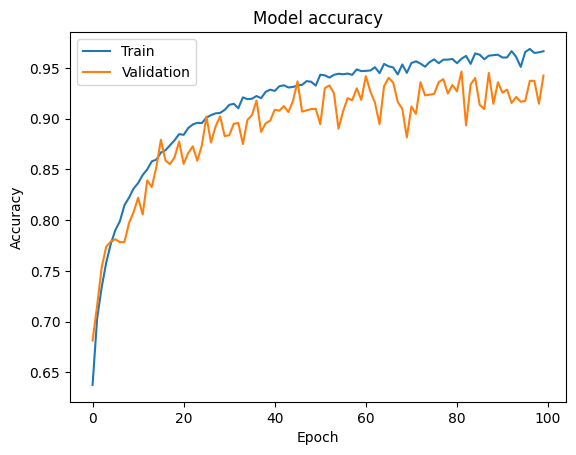

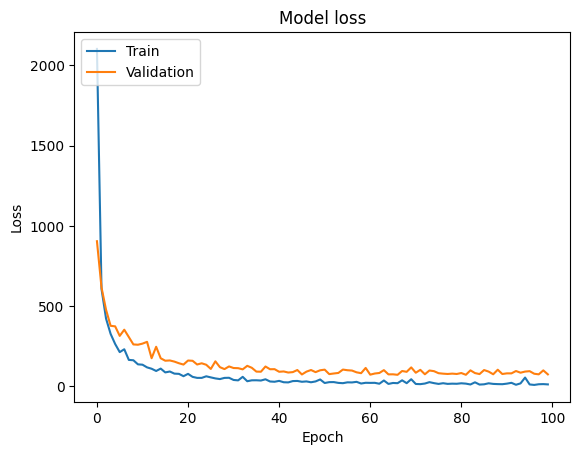

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
ROC AUC Score: 0.5429073048064933


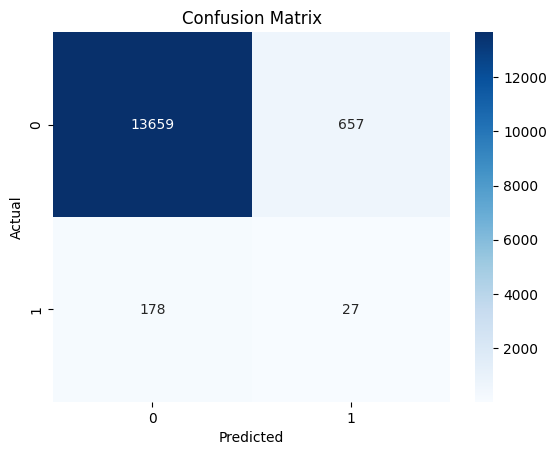

In [ ]:
ypred=model.predict(X_test)

ypredlabels=[]
for prediction in ypred:
  if prediction>0.5:
    ypredlabels.append(1)
  else:
    ypredlabels.append(0)

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, ypredlabels)
print("ROC AUC Score:", roc_auc)

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, ypredlabels)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib  # For saving and loading the model
from tensorflow import keras
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def load_model_and_predict(model_path, data_path):

    # Step 1: Load the model
    model = keras.models.load_model(model_path)
    print("Model loaded successfully.")

    # Step 2: Load the new data
    data = pd.read_csv(data_path)
    print("Data loaded successfully.")

    # Step 3: Preprocess the data
    # Drop unnecessary columns (modify based on the training pipeline)
    data = data.drop(columns='account_number', errors='ignore')
    data = data.drop(columns=['bureau_436', 'bureau_447'], errors='ignore')


    # Impute missing values
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    data_imputed = imputer.fit_transform(data)  # Impute missing values
    data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

    # One-hot encode categorical variables
    data_processed = pd.get_dummies(data_imputed, drop_first=True)

    # Align columns with the model's training data
    if hasattr(model, 'feature_names_in_'):
        data_processed = data_processed.reindex(columns=model.feature_names_in_, fill_value=0)

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data_processed), columns=data_processed.columns)

    # Step 4: Make predictions
    predictions = model.predict(data_scaled)
    prediction_probabilities = model.predict_proba(data_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    # Append predictions to the original data
    result = data.copy()
    result['Prediction'] = predictions
    if prediction_probabilities is not None:
        result['Prediction_Probability'] = prediction_probabilities

    print("Predictions generated successfully.")
    return result

In [ ]:
# Example usage
model_path = "/content/model.h5"  # Path to the saved model
data_path = "/content/drive/MyDrive/validation_data_to_be_shared.csv"  # Path to the new data
# Load the model and predict
original_data=pd.read_csv(data_path)
predictions_df = load_model_and_predict(model_path, data_path)
prediction = pd.DataFrame({
    'account_number': original_data['account_number'],
    'Prediction': predictions_df['Prediction']
})
# Save the predictions to a CSV file (optional)
prediction.to_csv('/content/predictions_output.csv', index=False)
print("Predictions saved to file.")

Model loaded successfully.
Data loaded successfully.
1306/1306 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Predictions generated successfully.
Predictions saved to file.


In [ ]:
prediction

,account_number,Prediction
0,100001,0.999
1,100002,0.001
2,100003,0.044
3,100004,0.001
4,100005,0.973
...,...,...
41787,141788,0.045
41788,141789,0.472
41789,141790,0.002
41790,141791,0.000
